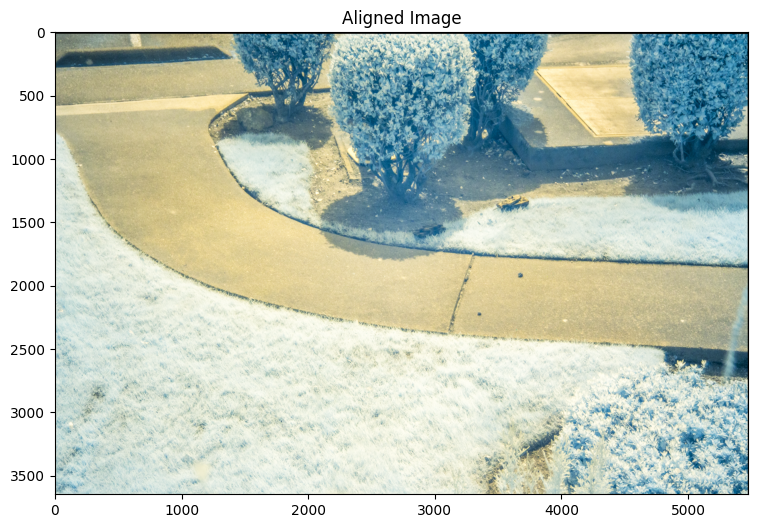

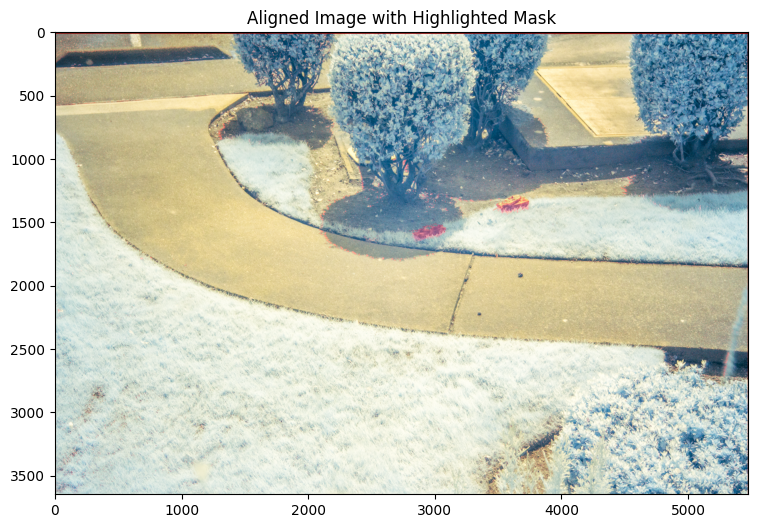

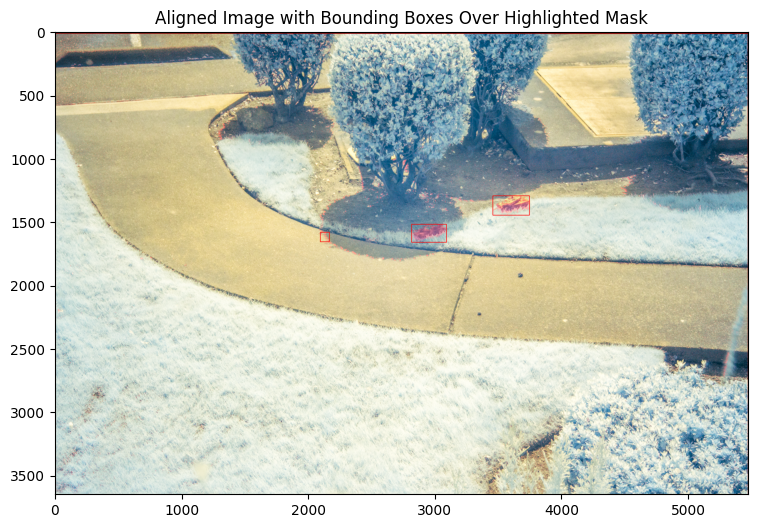

Overlay image saved as: /Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4/overlay_image_with_bounding_boxes.png
zoomed_vehicle_1 saved as /Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4/zoomed images/zoomed_vehicle_1.jpg
zoomed_vehicle_2 saved as /Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4/zoomed images/zoomed_vehicle_2.jpg
zoomed_vehicle_3 saved as /Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4/zoomed images/zoomed_vehicle_3.jpg


detect: weights=['/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Image Difference Detection Project/yolov5/runs/Tank Augmentation with Val and 70 epochs/best.pt'], source=/Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4/zoomed images/zoomed_vehicle_3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4/zoomed images, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/Users/adamrivardwalter/Data': No such file or directory
YOLOv5 🚀 2024-3-29 Python-3.10.8 torch-2.2.2 CPU

Fusing layers... 
YOLOv5x summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs


{'zoomed_vehicle_3': ['0 0.520566 0.51581 0.768638 0.715415'], 'zoomed_vehicle_2': ['0 0.50133 0.272727 0.986702 0.545455']}
Adjusted Bounding Boxes: {'zoomed_vehicle_3': [(3460, 1282, 299, 180)], 'zoomed_vehicle_2': [(2768, 1467, 370, 132)]}
Pixel Bounding Boxes: {'zoomed_vehicle_3': [(53, 39, 299, 180)], 'zoomed_vehicle_2': [(3, 0, 370, 132)]}
Adjusted Bounding Boxes for zoomed_vehicle_3: [(3460, 1282, 299, 180)]

Adjusted Bounding Boxes for zoomed_vehicle_2: [(2768, 1468, 370, 132)]



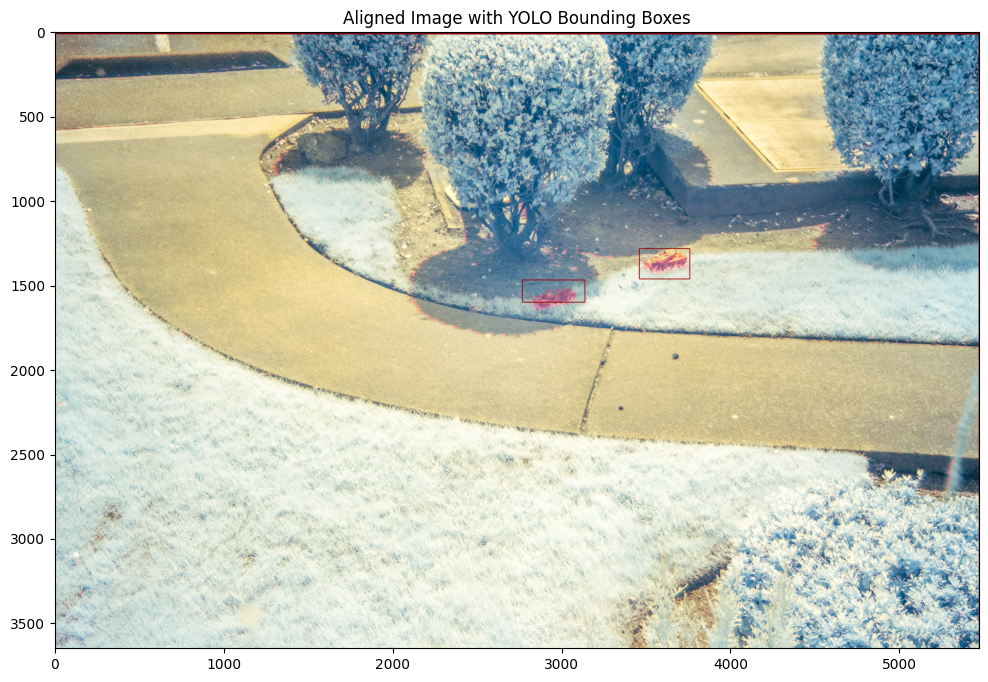

Image Width: 5472 pixels
Image Height: 3648 pixels
Focal Length: 67 mm
Camera Bearing: None degrees
Latitude: None
Longitude: None
Camera Tilt: None

zoomed_vehicle_3: Distance = 14.28 m, Bearing = 193.42 degrees, Latitude = 47.723728, Longitude = -122.209289

zoomed_vehicle_2: Distance = 13.53 m, Bearing = 189.83 degrees, Latitude = 47.723733, Longitude = -122.209276


Map has been saved to /Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4
CPU times: user 59 s, sys: 4.71 s, total: 1min 3s
Wall time: 1min 8s


In [1]:
%%time
# Import Libraries

# Image difference
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import subprocess

# Image File Conversion
import rawpy
import imageio
from PIL import Image
import time
import exiftool

# Calculate Distance
import math
from geopy.distance import geodesic

# Map Location
import folium
from geopy.distance import geodesic

#---------------------------

# Convert the RAW Canon .CR2 images to .PNG images
"""
def convert_images_to_png(source_folder):
    files = os.listdir(source_folder)
    image_files = [f for f in files if f.lower().endswith('.cr2')]
    
    for image_file in image_files:
        file_path = os.path.join(source_folder, image_file)
        with Image.open(file_path) as img:
            new_filename = os.path.splitext(image_file)[0] + '.png'
            new_file_path = os.path.join(source_folder, new_filename)
            img.save(new_file_path, 'PNG')
            print(f"Converted {image_file} to {new_filename}")

def get_modification_time(path):
    return os.path.getmtime(path)

# Load our .PNG images by datetime
def load_images_by_timestamp(source_folder):
    # Get all .PNG files
    files = os.listdir(source_folder)
    image_files = [f for f in files if f.lower().endswith('.png')]
    
    # Sort files by modification time
    image_files.sort(key=lambda x: get_modification_time(os.path.join(source_folder, x)))
    
    # Oldest and newest image paths
    image_1_path = os.path.join(source_folder, image_files[0])
    image_2_path = os.path.join(source_folder, image_files[-1])
    
    # Load images using OpenCV
    image_1 = cv2.imread(image_1_path)
    image_2 = cv2.imread(image_2_path)
    
    print(f"Oldest image loaded from {image_1_path}")
    print(f"Newest image loaded from {image_2_path}")
    
    return image_1, image_2

# Specify the source folder
#source_folder = '/Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 3'
source_folder = '/Users/adamrivardwalter/Desktop/Final Tank Project/Photo Editing/IMG_4766.CR2'
convert_images_to_png(source_folder)
image_1, image_2 = load_images_by_timestamp(source_folder)
""" 

#-------------------------

# Define paths
base_path = "/Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 4"
image_path = os.path.join(base_path, "IMG_4758-2.png")
reference_path = os.path.join(base_path, "IMG_4755.png")

# Load and process images
img1_color = cv2.imread(image_path)
img2_color = cv2.imread(reference_path)

#-------------------------
# takes offset images and aligns them into one image

# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 

# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
# (which is not required in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 

# Match features between the two images. 
# We create a Brute Force matcher with 
# Hamming distance as measurement mode. 
#matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match the two sets of descriptors. 
#matches = matcher.match(d1, d2) 
matches_tuple = matcher.match(d1, d2)
matches = matches_tuple

#matches = matches_tuple[0]  # Access the matches from the tuple
#matches = [match for match, in matches_tuple]  # Extract matches from the tuple


# Sort matches on the basis of their Hamming distance. 
matches = sorted(matches, key=lambda x: x.distance)


# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*0.9)] 
no_of_matches = len(matches) 

# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 

for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 

# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 

# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
					homography, (width, height)) 

# Save the output. 

aligned_image_path = os.path.join(base_path, "aligned_image.png")
cv2.imwrite(aligned_image_path, transformed_img)

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))  # Convert color from BGR to RGB for accurate display in matplotlib
plt.title("Aligned Image")
plt.show()

#----------------------
# Adds a mask to the aligned image to highlight new changes in the enviorment

# Load the reference image and aligned image (img2_color is the new referenced image based upon how the code above merges the two images)
reference_img = img2_color
aligned_img = transformed_img

# Convert images to grayscale
reference_gray = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)
aligned_gray = cv2.cvtColor(aligned_img, cv2.COLOR_BGR2GRAY)

# Compute the absolute difference between the aligned image and the reference image
difference = cv2.absdiff(aligned_gray, reference_gray)

# Threshold the difference to create a binary mask
_, mask = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)

# Create a red overlay by combining blue channel and the mask
overlay = cv2.merge((np.zeros_like(aligned_gray), np.zeros_like(aligned_gray), mask))

# Create a green overlay by combining blue channel and the mask
#overlay = cv2.merge((np.zeros_like(aligned_gray), mask, np.zeros_like(aligned_gray)))

#Create a blue overlay by combining blue channel and the mask
#overlay = cv2.merge((mask, np.zeros_like(aligned_gray), np.zeros_like(aligned_gray)))

# Create a magenta overlay by combining red and blue channels with the mask
#overlay = cv2.merge((mask, np.zeros_like(aligned_gray), mask))

# Add the overlay onto the reference image at 50%
result = cv2.addWeighted(aligned_img, 1, overlay, 0.5, 0)

# Add the overlay onto the reference image at 70%
#result = cv2.addWeighted(aligned_img, 1, overlay, 0.7, 0)

# Add the overlay onto the reference image at 30%
#result = cv2.addWeighted(aligned_img, 1, overlay, 0.3, 0)

# Invert the mask
inverted_mask = 255 - mask

# Save the output. 
aligned_mask_image_path = os.path.join(base_path, "aligned_with_mask_overlay.png")
mask_image_path = os.path.join(base_path, "output_mask.png")

cv2.imwrite(aligned_mask_image_path, result)
cv2.imwrite(mask_image_path, inverted_mask)

# Display the result
plt.figure(figsize=(10, 6))
plt.title('Aligned Image with Highlighted Mask')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


#------------------------

# Use the highlighted mask to find areas of interest and make note of possible vehicles


# Load the mask for processing and the original image for extraction
aligned_image = result #cv2.imread(aligned_image_path, cv2.IMREAD_COLOR)
mask =  inverted_mask #cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)

# Define the border exclusion size
border_exclusion = 30

# Exclude a border in the mask
mask[:border_exclusion, :] = 255
mask[-border_exclusion:, :] = 255
mask[:, :border_exclusion] = 255
mask[:, -border_exclusion:] = 255

# Apply threshold to find contours
_, mask_thresholded = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(mask_thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define padding size (in pixels)
padding = 50

# Dictionary to hold the zoomed images and their dimensions
zoomed_image_details = {}
zoomed_image_dimensions = {}

# Overlay image to draw bounding boxes separately
overlay_image = aligned_image.copy()
image_counter = 1  # Counter for image labels

for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)

    if 1000 < area < 25000 and 0.5 < aspect_ratio < 3:
        if x > border_exclusion and y > border_exclusion and x + w < overlay_image.shape[1] - border_exclusion and y + h < overlay_image.shape[0] - border_exclusion:
            x_padded = max(x - padding, 0)
            y_padded = max(y - padding, 0)
            w_padded = min(w + 2 * padding, aligned_image.shape[1] - x_padded)
            h_padded = min(h + 2 * padding, aligned_image.shape[0] - y_padded)
            
            # Save dimensions
            label = f"zoomed_vehicle_{image_counter}"
            zoomed_image_dimensions[label] = (w_padded, h_padded)

            # Save details for drawing bounding boxes
            zoomed_image_details[label] = (x_padded, y_padded, w_padded, h_padded)

            # Increment counter
            image_counter += 1

# The rest of your visualization and saving code follows

            cv2.rectangle(overlay_image, (x, y), (x + w, y + h), (0, 0, 255), 4)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image with Bounding Boxes Over Highlighted Mask')
plt.show()

# Save the output with bounding boxes
output_path = os.path.join(base_path, "overlay_image_with_bounding_boxes.png")
cv2.imwrite(output_path, overlay_image)
print("Overlay image saved as:", output_path)

# Save zoomed images
zoomed_images_folder = os.path.join(base_path, "zoomed images")
for label, details in zoomed_image_details.items():
    img_path = os.path.join(zoomed_images_folder, f"{label}.jpg")
    cv2.imwrite(img_path, aligned_image[details[1]:details[1]+details[3], details[0]:details[0]+details[2]])
    print(f"{label} saved as {img_path}")
    
    
#----------------------

# YOLOv5

# Define the directory to save zoomed images and run detection
yolov5_directory = "/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Image Difference Detection Project/yolov5"

# Assuming zoomed images are saved with a specific pattern
zoomed_images = [f for f in os.listdir(zoomed_images_folder) if f.startswith("zoomed_vehicle_")]

# Change directory to YOLOv5
os.chdir(yolov5_directory)

# Run YOLOv5 detect.py on each zoomed image
for image_name in zoomed_images:
    image_path = os.path.join(zoomed_images_folder, image_name)
    command = f"python detect.py --weights '/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Image Difference Detection Project/yolov5/runs/Tank Augmentation with Val and 70 epochs/best.pt' --img 640 --conf 0.25 --source '{image_path}' --project '{zoomed_images_folder}' --save-txt"
    subprocess.run(command, shell=True)
    
#-------------------

# Reading in the different vehicle Labels from the YOLOv5 output

# Base directory where the zoomed images and YOLOv5 outputs are stored

# Initialize a dictionary to store bounding box details
bbox_details = {}

# Helper function to process each .txt file and extract bounding box information
def process_txt_file(file_path, image_name):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Each line in the .txt file represents a bounding box
        # Format typically is: class_id x_center y_center width height (normalized)
        bbox_details[image_name] = [line.strip() for line in lines]

# Iterate over all directories in the base directory
for root, dirs, files in os.walk(zoomed_images_folder):
    for dir_name in dirs:
        if dir_name.startswith('exp'):  # Assuming all directories containing labels start with 'exp'
            labels_path = os.path.join(root, dir_name, 'labels')
            if os.path.exists(labels_path):
                # Process each .txt file within the labels directory
                for label_file in os.listdir(labels_path):
                    if label_file.endswith('.txt'):
                        full_path = os.path.join(labels_path, label_file)
                        image_name = label_file[:-4]  # Remove '.txt' to get the corresponding image name
                        process_txt_file(full_path, image_name)

# Print out or use the bounding box details
print(bbox_details)

#--------------------

def adjust_bbox_to_original(x_center, y_center, width, height, crop_x, crop_y, crop_w, crop_h):
    # Convert normalized coordinates (relative to the zoomed image) to absolute coordinates on the full image
    # The center must be recalculated to the original image scale and adjusted by the crop offset
    abs_x = int((x_center * crop_w - (width * crop_w / 2)) + crop_x)
    abs_y = int((y_center * crop_h - (height * crop_h / 2)) + crop_y)
    abs_w = int(width * crop_w)
    abs_h = int(height * crop_h)
    return abs_x, abs_y, abs_w, abs_h

# Iterate over each vehicle's detected bounding boxes
adjusted_bboxes = {}
for image_name, bboxes in bbox_details.items():
    crop_x, crop_y, crop_w, crop_h = zoomed_image_details[image_name]
    for bbox in bboxes:
        parts = bbox.split()
        x_center = float(parts[1])
        y_center = float(parts[2])
        width = float(parts[3])
        height = float(parts[4])

        adjusted_bbox = adjust_bbox_to_original(x_center, y_center, width, height, crop_x, crop_y, crop_w, crop_h)
        if image_name not in adjusted_bboxes:
            adjusted_bboxes[image_name] = []
        adjusted_bboxes[image_name].append(adjusted_bbox)

print("Adjusted Bounding Boxes:", adjusted_bboxes)

# Convert the bounding boxes to pixel coordinates
pixel_bboxes = {}

for vehicle, boxes in bbox_details.items():
    # Retrieve the dimensions of the zoomed image
    width, height = zoomed_image_dimensions[vehicle]
    pixel_bboxes[vehicle] = []

    for box in boxes:
        # Parse the box details
        _, x_center, y_center, norm_width, norm_height = map(float, box.split())
        
        # Calculate the pixel coordinates of the bounding box
        abs_x_center = x_center * width
        abs_y_center = y_center * height
        abs_width = norm_width * width
        abs_height = norm_height * height
        
        # Calculate top-left corner (to convert from center to top-left coordinates)
        abs_x = int(abs_x_center - (abs_width / 2))
        abs_y = int(abs_y_center - (abs_height / 2))
        
        # Append to the list as a tuple (x, y, width, height)
        pixel_bboxes[vehicle].append((abs_x, abs_y, int(abs_width), int(abs_height)))

print("Pixel Bounding Boxes:", pixel_bboxes)

# Adjust the bounding boxes to the original image coordinates
adjusted_bboxes = {}
for vehicle, bbox_list in pixel_bboxes.items():
    # Directly use the vehicle name as the key
    crop_x, crop_y, crop_w, crop_h = zoomed_image_details[vehicle]
    adjusted_bboxes[vehicle] = []
    for bbox in bbox_list:
        x, y, w, h = bbox
        # Adjust the bounding box to the original image
        orig_x = crop_x + x
        orig_y = crop_y + y
        # Width and height remain the same
        adjusted_bboxes[vehicle].append((orig_x, orig_y, w, h))

# Display the adjusted bounding boxes
for vehicle, boxes in adjusted_bboxes.items():
    print(f"Adjusted Bounding Boxes for {vehicle}: {boxes}\n")
    
#-----------------------
# Remove, only to visualize BB locations

# Load the original aligned image
original_image = result #cv2.imread(aligned_image_path)

# Bounding box details from your adjusted_bboxes output
# Color and thickness of rectangle lines
color = (0, 0, 155)  # Green
thickness = 4  # Thickness of the lines

# Draw each bounding box onto the original image
for image_name, boxes in adjusted_bboxes.items():
    for (x, y, w, h) in boxes:
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        # Draw rectangle on the image
        cv2.rectangle(original_image, top_left, bottom_right, color, thickness)

# Using matplotlib to display the image
#cv2.imwrite('/Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 3/calculated bboxes from yolo.jpg', original_image)

# Save the output 
yolo_overlay_path = os.path.join(base_path, "calculated bboxes from yolo.png")
cv2.imwrite(yolo_overlay_path, original_image)


plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert color from BGR to RGB
plt.title('Aligned Image with YOLO Bounding Boxes')
plt.show()

#----------------------

# Extract Metadata from Camera
def get_newest_cr2_file(directory):
    # List all files in the directory
    files = os.listdir(directory)
    # Filter for .CR2 files
    cr2_files = [file for file in files if file.lower().endswith('.cr2')]
    # Sort files by modification time, newest first
    cr2_files.sort(key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)
    # Return the path to the newest file
    if cr2_files:
        return os.path.join(directory, cr2_files[0])
    else:
        return None

def read_cr2_metadata(file_path, exiftool_path='/opt/homebrew/bin/exiftool'):
    with exiftool.ExifTool(executable=exiftool_path) as et:
        command = ["-j", file_path]
        metadata = et.execute_json(*command)
        metadata = metadata[0] if metadata else None
    return {
        "Image Width (pixels)": metadata.get('EXIF:ImageWidth'),
        "Image Height (pixels)": metadata.get('EXIF:ImageHeight'),
        "Focal Length (mm)": metadata.get('EXIF:FocalLength'),
        "Camera Bearing (degrees)": metadata.get('Composite:GPSDestBearing'),
        "Latitude": metadata.get('Composite:GPSLatitude'),
        "Longitude": metadata.get('Composite:GPSLongitude'),
        "Camera Tilt": metadata.get('XMP:CameraTilt')
    } if metadata else "No metadata found"

# Usage
#directory = "/Users/adamrivardwalter/Desktop/Final Tank Project/Different Spot 3"
newest_cr2_file = get_newest_cr2_file(base_path)
if newest_cr2_file:
    metadata = read_cr2_metadata(newest_cr2_file)
    if isinstance(metadata, dict):
        # Assign individual variables from metadata
        image_width_pixels = metadata.get('Image Width (pixels)', None)
        image_height_pixels = metadata.get('Image Height (pixels)', None)
        focal_length_mm = metadata.get('Focal Length (mm)', None)
        camera_bearing_deg = metadata.get('Camera Bearing (degrees)', None)
        latitude = metadata.get('Latitude', None)
        longitude = metadata.get('Longitude', None)
        camera_tilt = metadata.get('Camera Tilt', None)

        # Example of using these variables
        Print("Camera's MetaData:")
        print(f"Image Width: {image_width_pixels} pixels")
        print(f"Image Height: {image_height_pixels} pixels")
        print(f"Focal Length: {focal_length_mm} mm")
        print(f"Camera Bearing: {camera_bearing_deg} degrees")
        print(f"Latitude: {latitude}")
        print(f"Longitude: {longitude}")
        print(f"Camera Tilt: {camera_tilt}\n")
    else:
        print("Failed to extract metadata: ", metadata)
else:
    print("No .CR2 files found in the directory.")
    
#----------------------
    
# Function to convert degrees, minutes, seconds to decimal degrees (Depends on Camera Output)
def dms_to_dd(degrees, minutes, seconds, direction):
    dd = degrees + minutes/60 + seconds/(60*60)
    if direction in ['S', 'W']:
        dd *= -1
    return dd

# Applying the conversion for the given latitude and longitude
lat_origin_decimal = dms_to_dd(47, 43, 25.872, 'N')
long_origin_decimal = dms_to_dd(122, 12, 33.282, 'W')

lat_origin_decimal, long_origin_decimal    

#----------------------


def calculate_positions(b_boxes_dict, image_width, image_height, sensor_width_mm, sensor_height_mm, focal_length_mm, tilt, altitude, bearing, camera_lat, camera_lon):
    # Calculate the horizontal and vertical field of view
    h_fov = 2 * math.atan((sensor_width_mm / 2) / focal_length_mm) * (180 / math.pi)
    v_fov = 2 * math.atan((sensor_height_mm / 2) / focal_length_mm) * (180 / math.pi)
    
    results = {}
    for label, boxes in b_boxes_dict.items():
        for b_box in boxes:
            center_x = b_box[0] + b_box[2] / 2
            center_y = b_box[1] + b_box[3] / 2
            angle_offset_x = ((center_x - image_width / 2) / (image_width / 2)) * (h_fov / 2)
            angle_offset_y = ((center_y - image_height / 2) / (image_height / 2)) * (v_fov / 2)
            combined_angle_y = tilt + angle_offset_y
            distance = altitude / math.tan(math.radians(combined_angle_y)) if combined_angle_y != 0 else float('inf')
            object_bearing = (bearing + angle_offset_x) % 360

            # Calculate the new coordinates using geodesic
            new_location = geodesic(kilometers=distance / 1000).destination((lat_origin_decimal, long_origin_decimal), object_bearing)
            results[label] = {
                'distance': distance,
                'bearing': object_bearing,
                'latitude': new_location.latitude,
                'longitude': new_location.longitude
            }
    return results


# Camera Variables (fixed or not pulled from camera metadata)
sensor_width_mm = 35.8
sensor_height_mm = 23.9
#focal_length_mm = 67
#image_width_pixels = 5496  
#image_height_pixels = 3648
camera_altitude_m = 4.5
camera_tilt_deg = 20
camera_bearing_deg = 188.645


distances_and_bearings = calculate_positions(
    adjusted_bboxes,
    image_width_pixels,
    image_height_pixels,
    sensor_width_mm,
    sensor_height_mm,
    focal_length_mm,
    camera_tilt_deg,
    camera_altitude_m,
    camera_bearing_deg,
    lat_origin_decimal,
    long_origin_decimal 
)

# Print the results
for label, details in distances_and_bearings.items():
    print(f"{label}: Distance = {details['distance']:.2f} m, Bearing = {details['bearing']:.2f} degrees, Latitude = {details['latitude']:.6f}, Longitude = {details['longitude']:.6f}\n")


#--------------------------

# Creates a map of the Tank's positions relative to the camera
object_locations = []
for label, details in distances_and_bearings.items():
    distance = details['distance']
    bearing = details['bearing']
    # Convert meters to kilometers for geodesic function
    new_coords = geodesic(kilometers=distance / 1000).destination((lat_origin_decimal, long_origin_decimal), bearing)
    object_locations.append((label, (new_coords.latitude, new_coords.longitude)))

# Creating the map and markers
object_map = folium.Map(location=(lat_origin_decimal, long_origin_decimal), zoom_start=18)
folium.Marker(location=(lat_origin_decimal, long_origin_decimal), popup="Camera Location", icon=folium.Icon(color='red', icon='camera')).add_to(object_map)

for label, loc in object_locations:
    folium.Marker(location=loc, popup=f"{label}: {loc}", icon=folium.Icon(color='blue', icon='unchecked')).add_to(object_map)

# Save the map as an HTML file
file_path = os.path.join(base_path, "map.html")  # Using base_path variable for consistency
object_map.save(file_path)
print(f"\nMap has been saved to {base_path}")

object_map

